In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read data

folder_fields = "/home/anais/Alexandre/data/CCGM_500um_496nm_50uN_110Pa-h_1p5cm_m_128g/muDIC"

frames_true = np.load(os.path.join(folder_fields, "frames.npy"))
coords = np.load(os.path.join(folder_fields, "coords.npy"))
strain = np.load(os.path.join(folder_fields, "true_strain.npy"))

with open(os.path.join(folder_fields, 'params.txt')) as file:
    params = file.read()

In [4]:
# Data shape

print(f"Frames computed: {frames_true.tolist()}")
print(f"Coords of shape {coords.shape} -> (useless, x or y, x_elem, y_elem, frame)")
print(f"Strain of shape {strain.shape} -> (useless, ?, ?, x_elem, y_elem, frame)")

Frames computed: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495]
Coords of shape (1, 2, 29, 20, 100) -> (useless, x or y, x_elem, y_elem, frame)
Strain of shape (1, 2, 2, 29, 20, 100) -> (useless, ?, ?, x_elem, y_elem, frame)


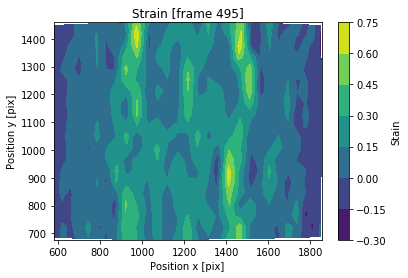

In [6]:
# Plot the strain

frame = -1
frame_true = frames_true[frame]

x = coords[0,0,:,:,frame]
y = coords[0,1,:,:,frame]

strain_toPlot = strain[0,0,0,:,:,frame]

fig, ax = plt.subplots()
ax.set_title(f"Strain [frame {frame_true}]")

im = ax.contourf(x, y, strain_toPlot)
fig.colorbar(im, ax=ax, label="Stain")

ax.set_xlabel('Position x [pix]')
ax.set_ylabel('Position y [pix]')

plt.show()

In [13]:
print(y.shape)
y[y.shape[0]//2,:]

(29, 20)


array([ 676.94881631,  718.68504256,  760.20932832,  801.22600622,
        842.36967414,  883.70807569,  924.88301641,  966.01359443,
       1007.32955343, 1049.20215221, 1090.81141188, 1131.45152876,
       1171.6644009 , 1212.56526845, 1254.29685851, 1294.05416913,
       1334.13375807, 1376.04733445, 1417.81172945, 1458.7314954 ])

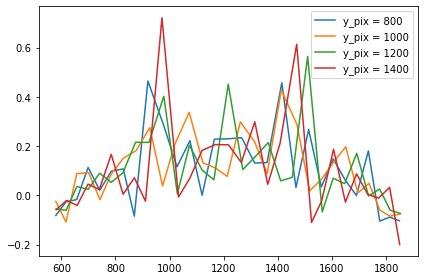

In [16]:
# Plot the final strain along given lines

y_pix_list = [800, 1000, 1200, 1400]

# Find nearest element for each y_pix
y_elem_list = []
for y_pix in y_pix_list:
    y_elem = np.argmin(np.abs(y_pix - y[y.shape[0]//2,:]))
    y_elem_list.append(y_elem)

# Plot
fig, ax = plt.subplots(tight_layout=True)

for y_pix, y_elem in zip(y_pix_list, y_elem_list):
    ax.plot(x[:,y_elem], strain_toPlot[:,y_elem], label=f'y_pix = {y_pix}')

ax.legend()